In [1]:
import os
import sys

project_directory = os.path.abspath('..')
sys.path.append(project_directory)

In [2]:
import torch
import torch.nn as nn
from src.utils.plotting import plot_history
from src.utils.common import set_seed, DEVICE
from src.dataloaders.dataloader import create_dataloaders
from src.models.modern_cnn_v1 import ModernCNNv1
from src.train.engine import train_one_epoch, eval_one_epoch
from src.train.trainer import EarlyStopper, fit
from torch.optim.lr_scheduler import CosineAnnealingLR
set_seed(42)

In [4]:
train_loader, val_loader, test_loader = create_dataloaders(data_root='../data')

##### result_v1: No Erly Stopper, No Scheduler

In [5]:
model_v1 = ModernCNNv1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v1.parameters(), lr=1e-4)
epochs = 20

In [6]:
result_v1 = fit(
    model=model_v1,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    epochs=epochs,
    early_stopper=None,
    scheduler=None
)

c:\Users\Engineer\AppData\Local\Programs\cv_env\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


EPOCH 1/20 | Train Loss: 1.607835 Acc: 0.407444 | Val Loss: 1.278845 Acc: 0.540000 
EPOCH 2/20 | Train Loss: 1.237691 Acc: 0.549867 | Val Loss: 1.061722 Acc: 0.613400 
EPOCH 3/20 | Train Loss: 1.059240 Acc: 0.622689 | Val Loss: 0.891066 Acc: 0.679000 
EPOCH 4/20 | Train Loss: 0.954933 Acc: 0.663133 | Val Loss: 0.820102 Acc: 0.710600 
EPOCH 5/20 | Train Loss: 0.879465 Acc: 0.690667 | Val Loss: 0.770904 Acc: 0.728600 
EPOCH 6/20 | Train Loss: 0.819546 Acc: 0.712244 | Val Loss: 0.752586 Acc: 0.735600 
EPOCH 7/20 | Train Loss: 0.774199 Acc: 0.730756 | Val Loss: 0.659495 Acc: 0.768800 
EPOCH 8/20 | Train Loss: 0.733478 Acc: 0.745356 | Val Loss: 0.709113 Acc: 0.747200 
EPOCH 9/20 | Train Loss: 0.704693 Acc: 0.756133 | Val Loss: 0.647574 Acc: 0.773600 
EPOCH 10/20 | Train Loss: 0.676699 Acc: 0.767556 | Val Loss: 0.595907 Acc: 0.793600 
EPOCH 11/20 | Train Loss: 0.652501 Acc: 0.774489 | Val Loss: 0.614756 Acc: 0.783000 
EPOCH 12/20 | Train Loss: 0.628948 Acc: 0.783067 | Val Loss: 0.585149 Acc:

In [7]:
result_v1

{'train_loss': [1.607834597990248,
  1.2376905620786878,
  1.05924043191274,
  0.9549331665992736,
  0.8794647214253744,
  0.8195457109663221,
  0.7741986882739597,
  0.7334784593476189,
  0.7046926882637872,
  0.6766987527741326,
  0.6525009239408704,
  0.6289484213617113,
  0.6112981849140591,
  0.5911851096895006,
  0.5780780907101102,
  0.5584510922855801,
  0.5404162349489,
  0.5344926576614379,
  0.5202559725337559,
  0.5088909392674764],
 'val_loss': [1.2788446111679077,
  1.061721781539917,
  0.891065954208374,
  0.8201018345832825,
  0.7709044122695923,
  0.7525860610961914,
  0.6594950024604798,
  0.7091134881973267,
  0.6475738477706909,
  0.5959070156097412,
  0.6147561000823974,
  0.5851493179798126,
  0.5552677317619323,
  0.577948648262024,
  0.5282635982036591,
  0.5269103810310364,
  0.5410277077198029,
  0.530669621372223,
  0.5087896462917327,
  0.49107654514312743],
 'train_acc': [0.40744444444444444,
  0.5498666666666666,
  0.6226888888888888,
  0.6631333333333334,

In [8]:
config = {
    "run_name": "run_001_baseline",
    "model": {
        "name": "ModernCNNv1"
    },
    "seed": 42,
    "dataset": {
        "name": "CIFAR-10",
        "num_classes": 10
    },
    "training": {
        "epochs": epochs,
        "batch_size": train_loader.batch_size,
        "device": str(DEVICE)
    },
    "optimizer": {
        "name": "Adam",
        "lr": 0.001,
        "weight_decay": 0.0
    },
    "scheduler": None,
    "early_stopping": None
}


In [9]:
config

{'run_name': 'run_001_baseline',
 'model': {'name': 'ModernCNNv1'},
 'seed': 42,
 'dataset': {'name': 'CIFAR-10', 'num_classes': 10},
 'training': {'epochs': 20, 'batch_size': 64, 'device': 'cpu'},
 'optimizer': {'name': 'Adam', 'lr': 0.001, 'weight_decay': 0.0},
 'scheduler': None,
 'early_stopping': None}

In [10]:
import json
from pathlib import Path

In [11]:
run_dir = Path("../runs/run_001_baseline")
run_dir.mkdir(parents=True, exist_ok=True)

# Save config.json
config_path = run_dir / "config.json"
with open(config_path, "w") as f:
    json.dump(config, f, indent=2)

print(f"Saved config to {config_path}")


Saved config to ..\runs\run_001_baseline\config.json


In [12]:
history = result_v1

# Save history.json
history_path = run_dir / "history.json"
with open(history_path, "w") as f:
    json.dump(history, f, indent=2)

print(f"Saved history to {history_path}")


Saved history to ..\runs\run_001_baseline\history.json


In [13]:
val_acc_curve = history["val_acc"]
val_loss_curve = history["val_loss"]

best_epoch = max(range(len(val_acc_curve)), key=lambda i: val_acc_curve[i])
best_val_acc = val_acc_curve[best_epoch]
best_val_loss = val_loss_curve[best_epoch]

metrics = {
    "num_epochs_ran": len(history["train_loss"]),
    "best_epoch": best_epoch + 1,  # human-friendly (1-based)
    "best_val_acc": best_val_acc,
    "best_val_loss": best_val_loss,
    "final_train_acc": history["train_acc"][-1],
    "final_val_acc": history["val_acc"][-1],
    "final_train_loss": history["train_loss"][-1],
    "final_val_loss": history["val_loss"][-1],
}

run_dir = Path("../runs/run_001_baseline")
metrics_path = run_dir / "metrics.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=2)

print(f"Saved metrics to {metrics_path}")
print(metrics)


Saved metrics to ..\runs\run_001_baseline\metrics.json
{'num_epochs_ran': 20, 'best_epoch': 20, 'best_val_acc': 0.8326, 'best_val_loss': 0.49107654514312743, 'final_train_acc': 0.8241111111111111, 'final_val_acc': 0.8326, 'final_train_loss': 0.5088909392674764, 'final_val_loss': 0.49107654514312743}


In [14]:
best_model_path = run_dir / "best.pt"
torch.save(model_v1.state_dict(), best_model_path)
print(f"Saved best model to {best_model_path}")

Saved best model to ..\runs\run_001_baseline\best.pt


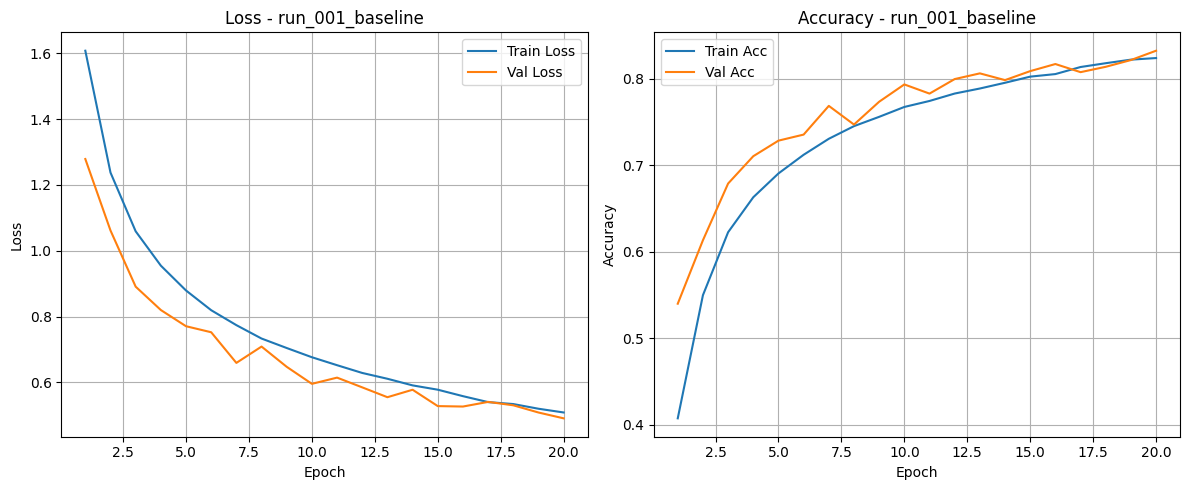

Saved plot to ..\reports\figures\run_001_baseline_training_curves.png


In [15]:
import json

with open("../runs/run_001_baseline/history.json") as f:
    history = json.load(f)

plot_history(
    history,
    run_name="run_001_baseline"
)


##### result_v2: No Erly Stopper, With Scheduler

In [25]:
model_v2 = ModernCNNv1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v2.parameters(), lr=1e-4)
epochs = 20

scheduler_cosine = CosineAnnealingLR(
    optimizer=optimizer,
    T_max=epochs,
    eta_min=1e-6
)

In [26]:
result_v2 = fit(
    model=model_v2,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    epochs=epochs,
    early_stopper=None,
    scheduler=scheduler_cosine
)

c:\Users\Engineer\AppData\Local\Programs\cv_env\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


EPOCH 1/20 | Train Loss: 1.601177 Acc: 0.410244 | Val Loss: 1.210533 Acc: 0.561800 
EPOCH 2/20 | Train Loss: 1.237831 Acc: 0.552178 | Val Loss: 1.058929 Acc: 0.622800 
EPOCH 3/20 | Train Loss: 1.082727 Acc: 0.614867 | Val Loss: 0.945364 Acc: 0.659000 
EPOCH 4/20 | Train Loss: 0.982250 Acc: 0.651222 | Val Loss: 0.847970 Acc: 0.694600 
EPOCH 5/20 | Train Loss: 0.914663 Acc: 0.675733 | Val Loss: 0.818975 Acc: 0.702600 
EPOCH 6/20 | Train Loss: 0.847833 Acc: 0.704044 | Val Loss: 0.768402 Acc: 0.727400 
EPOCH 7/20 | Train Loss: 0.799935 Acc: 0.720022 | Val Loss: 0.718800 Acc: 0.741800 
EPOCH 8/20 | Train Loss: 0.762182 Acc: 0.735556 | Val Loss: 0.666732 Acc: 0.757800 
EPOCH 9/20 | Train Loss: 0.731194 Acc: 0.747044 | Val Loss: 0.688883 Acc: 0.761600 
EPOCH 10/20 | Train Loss: 0.704664 Acc: 0.754244 | Val Loss: 0.647062 Acc: 0.767000 
EPOCH 11/20 | Train Loss: 0.676810 Acc: 0.764867 | Val Loss: 0.621038 Acc: 0.781200 
EPOCH 12/20 | Train Loss: 0.650447 Acc: 0.774422 | Val Loss: 0.600227 Acc:

In [27]:
result_v2

{'train_loss': [1.6011768631193373,
  1.2378312509112888,
  1.082727104833391,
  0.9822499890645345,
  0.914663446908527,
  0.8478333990097046,
  0.7999346733517116,
  0.7621824878904555,
  0.7311941806369358,
  0.7046636106914944,
  0.6768100474357605,
  0.6504470109091864,
  0.6319579044553969,
  0.6144991864098442,
  0.594653909503089,
  0.5938925017992656,
  0.5795402771313986,
  0.5736136342260573,
  0.5709545007069906,
  0.5649891313129001],
 'val_loss': [1.2105333513259888,
  1.0589286383628844,
  0.9453644262313843,
  0.8479700407505035,
  0.8189752864837646,
  0.7684022954940796,
  0.7188000064849853,
  0.6667321000099182,
  0.6888830389976501,
  0.647061704492569,
  0.6210383972167969,
  0.6002273711681366,
  0.5845205031394959,
  0.5865898648738861,
  0.5657504911899567,
  0.563445577287674,
  0.5616474635601044,
  0.5505434805870056,
  0.5534540230035782,
  0.5481878384113312],
 'train_acc': [0.41024444444444447,
  0.5521777777777778,
  0.6148666666666667,
  0.6512222222222

In [28]:
config_cosine = {
    "run_name": "run_002_cosine",
    "model": {
        "name": "ModernCNNv1"
    },
    "seed": 42,
    "dataset": {
        "name": "CIFAR-10",
        "num_classes": 10
    },
    "training": {
        "epochs": epochs,
        "batch_size": train_loader.batch_size,
        "device": str(DEVICE)
    },
    "optimizer": {
        "name": "Adam",
        "lr": 0.001,
        "weight_decay": 0.0
    },
    "scheduler": {
        "name": "CosineAnnealingLR",
        "T_max": epochs,
        "eta_min": 1e-6
    },
    "early_stopping": None
}


In [29]:
run_dir_cosine = Path("../runs/run_002_cosine")
run_dir_cosine.mkdir(parents=True, exist_ok=True)

# Save config.json
config_path_cosine = run_dir_cosine / "config.json"
with open(config_path_cosine, "w") as f:
    json.dump(config_cosine, f, indent=2)

print(f"Saved config to {config_path_cosine}")

Saved config to ..\runs\run_002_cosine\config.json


In [30]:
history_cosine = result_v2

# Save history.json
history_path_cosine = run_dir_cosine / "history.json"
with open(history_path_cosine, "w") as f:
    json.dump(history_cosine, f, indent=2)

print(f"Saved history to {history_path_cosine}")

Saved history to ..\runs\run_002_cosine\history.json


In [31]:
val_acc_curve_cosine = history_cosine["val_acc"]
val_loss_curve_cosine = history_cosine["val_loss"]

best_epoch_cosine = max(range(len(val_acc_curve_cosine)), key=lambda i: val_acc_curve_cosine[i])
best_val_acc_cosine = val_acc_curve_cosine[best_epoch_cosine]
best_val_loss_cosine = val_loss_curve_cosine[best_epoch_cosine]

metrics_cosine = {
    "num_epochs_ran": len(history_cosine["train_loss"]),
    "best_epoch": best_epoch_cosine + 1,  # human-friendly (1-based)
    "best_val_acc": best_val_acc_cosine,
    "best_val_loss": best_val_loss_cosine,
    "final_train_acc": history_cosine["train_acc"][-1],
    "final_val_acc": history_cosine["val_acc"][-1],
    "final_train_loss": history_cosine["train_loss"][-1],
    "final_val_loss": history_cosine["val_loss"][-1],
}

metrics_path_cosine = run_dir_cosine / "metrics.json"
with open(metrics_path_cosine, "w") as f:
    json.dump(metrics_cosine, f, indent=2)

print(f"Saved metrics to {metrics_path_cosine}")


Saved metrics to ..\runs\run_002_cosine\metrics.json


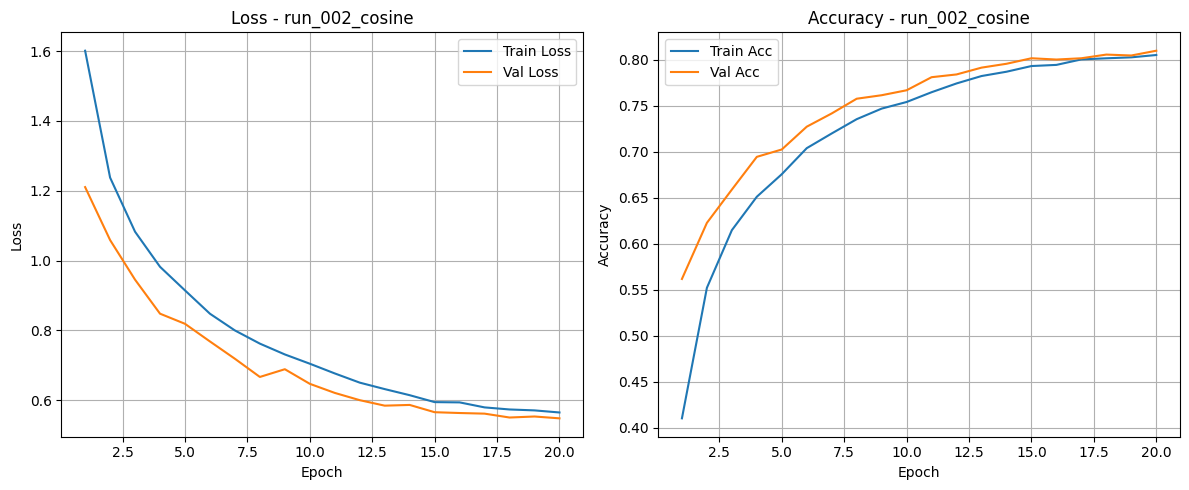

Saved plot to ..\reports\figures\run_002_cosine_training_curves.png


In [32]:
import json

with open("../runs/run_002_cosine/history.json") as f:
    history_cosine = json.load(f)

plot_history(
    history_cosine,
    run_name="run_002_cosine"
)

##### result_v3: with Erly Stopper, With Scheduler

In [33]:
model_v3 = ModernCNNv1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v3.parameters(), lr=1e-4)
early_stoper = EarlyStopper()
epochs = 20

scheduler_cosine = CosineAnnealingLR(
    optimizer=optimizer,
    T_max=epochs,
    eta_min=1e-6
)

In [34]:
result_v3 = fit(
    model=model_v3,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    epochs=epochs,
    early_stopper=early_stoper,
    scheduler=scheduler_cosine
)

c:\Users\Engineer\AppData\Local\Programs\cv_env\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


EPOCH 1/20 | Train Loss: 1.635709 Acc: 0.395089 | Val Loss: 1.304491 Acc: 0.532800 
EPOCH 2/20 | Train Loss: 1.278116 Acc: 0.538711 | Val Loss: 1.048336 Acc: 0.631600 
EPOCH 3/20 | Train Loss: 1.112817 Acc: 0.603578 | Val Loss: 0.962883 Acc: 0.656800 
EPOCH 4/20 | Train Loss: 1.007437 Acc: 0.643289 | Val Loss: 0.876805 Acc: 0.689800 
EPOCH 5/20 | Train Loss: 0.927417 Acc: 0.672689 | Val Loss: 0.798775 Acc: 0.709200 
EPOCH 6/20 | Train Loss: 0.868774 Acc: 0.694200 | Val Loss: 0.755860 Acc: 0.728200 
EPOCH 7/20 | Train Loss: 0.816704 Acc: 0.713133 | Val Loss: 0.727366 Acc: 0.738600 
EPOCH 8/20 | Train Loss: 0.776267 Acc: 0.730422 | Val Loss: 0.702928 Acc: 0.748800 
EPOCH 9/20 | Train Loss: 0.743568 Acc: 0.743578 | Val Loss: 0.682284 Acc: 0.757200 
EPOCH 10/20 | Train Loss: 0.709476 Acc: 0.753022 | Val Loss: 0.631601 Acc: 0.770000 
EPOCH 11/20 | Train Loss: 0.686546 Acc: 0.759644 | Val Loss: 0.626932 Acc: 0.778800 
EPOCH 12/20 | Train Loss: 0.661356 Acc: 0.770711 | Val Loss: 0.606259 Acc:

In [35]:
result_v3

{'train_loss': [1.6357092056062486,
  1.2781164416419135,
  1.1128170029534235,
  1.0074370461887783,
  0.927416594420539,
  0.8687741974724663,
  0.8167035831451416,
  0.776266588083903,
  0.7435680865711636,
  0.709475554784139,
  0.6865459987640381,
  0.6613560158994463,
  0.6475279633204142,
  0.6261343831274244,
  0.61521645154953,
  0.6013935082965427,
  0.5894541004975636,
  0.5828925475650364,
  0.5786724006546868,
  0.5728116495556301],
 'val_loss': [1.3044910470962525,
  1.048335962867737,
  0.962882577419281,
  0.8768048429489136,
  0.7987745378494263,
  0.7558597140312194,
  0.7273657212257385,
  0.702927903175354,
  0.6822841630935669,
  0.6316008114814758,
  0.626932185792923,
  0.6062591897964478,
  0.6015124439239502,
  0.5755310046195984,
  0.5759151639938355,
  0.5644353817939758,
  0.5559067385673523,
  0.5509910859107972,
  0.5536573422431946,
  0.5559982576370239],
 'train_acc': [0.3950888888888889,
  0.5387111111111111,
  0.6035777777777778,
  0.6432888888888889,


In [36]:
config_cosine_earlystop = {
    "run_name": "run_003_cosine_earlystop",
    "model": {
        "name": "ModernCNNv1"
    },
    "seed": 42,
    "dataset": {
        "name": "CIFAR-10",
        "num_classes": 10
    },
    "training": {
        "epochs": epochs,
        "batch_size": train_loader.batch_size,
        "device": str(DEVICE)
    },
    "optimizer": {
        "name": "Adam",
        "lr": 0.001,
        "weight_decay": 0.0
    },
    "scheduler": {
        "name": "CosineAnnealingLR",
        "T_max": epochs,
        "eta_min": 1e-6
    },
    "early_stopping": {
        "enabled": True,
        "patience": early_stoper.patience,
        "min_delta": early_stoper.min_delta
    }
}


In [37]:
run_dir_cosine_earlystop = Path("../runs/run_003_cosine_earlystop")
run_dir_cosine_earlystop.mkdir(parents=True, exist_ok=True)

# Save config.json
config_path_cosine_earlystop = run_dir_cosine_earlystop / "config.json"
with open(config_path_cosine_earlystop, "w") as f:
    json.dump(config_cosine_earlystop, f, indent=2)

print(f"Saved config to {config_path_cosine_earlystop}")

Saved config to ..\runs\run_003_cosine_earlystop\config.json


In [38]:
history_cosine_earlystop = result_v3

# Save history.json
history_path_cosine_earlystop = run_dir_cosine_earlystop / "history.json"
with open(history_path_cosine_earlystop, "w") as f:
    json.dump(history_cosine_earlystop, f, indent=2)

print(f"Saved history to {history_path_cosine_earlystop}")

Saved history to ..\runs\run_003_cosine_earlystop\history.json


In [39]:
val_acc_curve_cosine_earlystop = history_cosine_earlystop["val_acc"]
val_loss_curve_cosine_earlystop = history_cosine_earlystop["val_loss"]

best_epoch_cosine_earlystop = max(range(len(val_acc_curve_cosine_earlystop)), key=lambda i: val_acc_curve_cosine_earlystop[i])
best_val_acc_cosine_earlystop = val_acc_curve_cosine_earlystop[best_epoch_cosine_earlystop]
best_val_loss_cosine_earlystop = val_loss_curve_cosine_earlystop[best_epoch_cosine_earlystop]

metrics_cosine_earlystop = {
    "num_epochs_ran": len(history_cosine_earlystop["train_loss"]),
    "best_epoch": best_epoch_cosine_earlystop + 1,  # human-friendly (1-based)
    "best_val_acc": best_val_acc_cosine_earlystop,
    "best_val_loss": best_val_loss_cosine_earlystop,
    "final_train_acc": history_cosine_earlystop["train_acc"][-1],
    "final_val_acc": history_cosine_earlystop["val_acc"][-1],
    "final_train_loss": history_cosine_earlystop["train_loss"][-1],
    "final_val_loss": history_cosine_earlystop["val_loss"][-1],
}

metrics_path_cosine_earlystop = run_dir_cosine_earlystop / "metrics.json"
with open(metrics_path_cosine_earlystop, "w") as f:
    json.dump(metrics_cosine_earlystop, f, indent=2)

print(f"Saved metrics to {metrics_path_cosine_earlystop}")


Saved metrics to ..\runs\run_003_cosine_earlystop\metrics.json


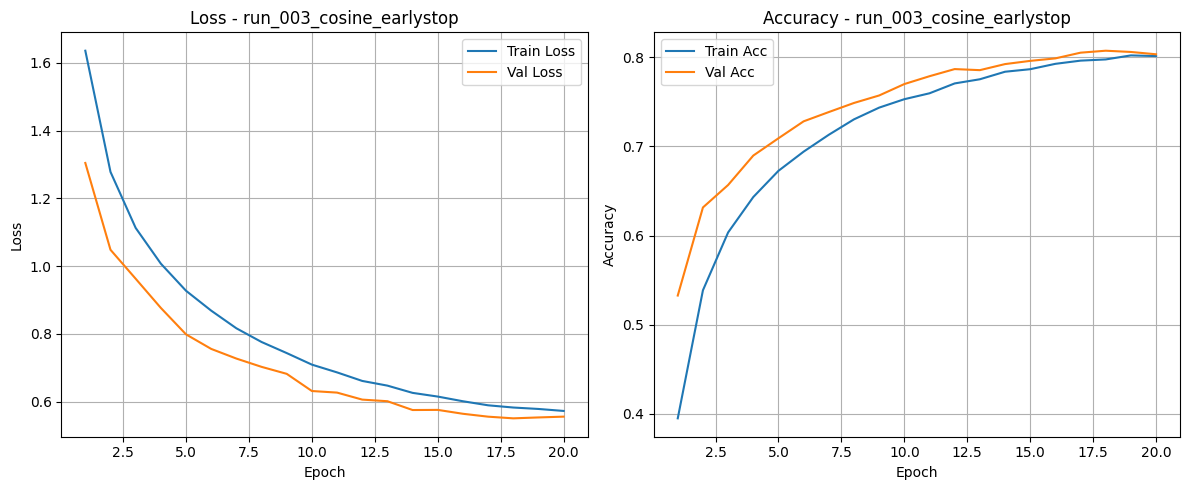

Saved plot to ..\reports\figures\run_003_cosine_earlystop_training_curves.png


In [40]:
import json

with open("../runs/run_003_cosine_earlystop/history.json") as f:
    history_cosine_earlystop = json.load(f)

plot_history(
    history_cosine_earlystop,
    run_name="run_003_cosine_earlystop"
)

## Next Step: Increase Epochs with Scheduler + Early Stopping

The previous run using **CosineAnnealingLR + Early Stopping** did **not trigger early stopping** within the initial epoch budget.

### Interpretation
- Validation loss was still improving (even if slowly)
- Training had not fully converged
- Current epoch count is likely insufficient

### Decision
Increase the maximum number of epochs **while keeping early stopping enabled**.

This allows:
- The model to continue improving if beneficial
- Early stopping to automatically halt training once validation performance plateaus

### Plan
- Increase `epochs` (e.g., from 20 → 40)
- Keep:
  - Same model architecture
  - Same optimizer and scheduler
  - Same seed and data split
  - Early stopping ON

Early stopping will now determine the optimal stopping point.
